IMPORTANCIA DE BIBLIOTECAS Y MONTAJE DE DRIVE
Para manipulacion de datos, graficos y calculos numericos.Permite acceder a los archivos almacenados en tu google drive del entorno de colab.

In [1]:
import pandas as pd

# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CARGA DE REPARACION DE DATOS
Lee los datos de archivo, separa las caracteristicas (x) de las variables objetivo (y) e imprime las dimensiones.

In [3]:
data = np.genfromtxt('/content/drive/MyDrive/enfermedades_del_corazon (1).csv', delimiter=',', skip_header=1)

# Separa las características (X) y la variable objetivo (y)
X = data[:, 0:5]  # Columnas 0 a 4 para las características
y = data[:, 11]   # Columna 11 para la variable objetivo

In [4]:
print(X.shape)
print(y.shape)


(1190, 5)
(1190,)


In [5]:
print(y)

[0. 1. 0. ... 1. 1. 0.]


In [6]:
print(X)

[[ 40.   1.   2. 140. 289.]
 [ 49.   0.   3. 160. 180.]
 [ 37.   1.   2. 130. 283.]
 ...
 [ 57.   1.   4. 130. 131.]
 [ 57.   0.   2. 130. 236.]
 [ 38.   1.   3. 138. 175.]]


VISUALIZACION DE DATOS
Crear una funcion para graficar los datos, mostrando los puntos de dispersion para el evento "si muere" y "no muere" grafica los datos usando la funcion definida.

In [7]:
def plotData(X, y):


    # Se filtran los datos para las dos clases
    DEATH_EVENT = X[y == 0]  # Datos para 'evento de muerte' (y=0)
    no_DEATH_EVENT = X[y == 1] # Datos para 'no evento de muerte' (y=1)

    # Se grafican los puntos de dispersión para cada clase
    pyplot.scatter(DEATH_EVENT[:, 1], DEATH_EVENT[:, 0], marker='*', c='black', label='evento de muerte', s=100)
    pyplot.scatter(no_DEATH_EVENT[:, 1], no_DEATH_EVENT[:, 0], marker='o', c='yellow', edgecolor='black', label='No evento de muerte', s=80)

    # Se configuran las etiquetas de los ejes y la leyenda
    pyplot.xlabel('Creatina')
    pyplot.ylabel('faccion de eyeccion')
    pyplot.legend()

    # Se muestra la gráfica
    pyplot.show()

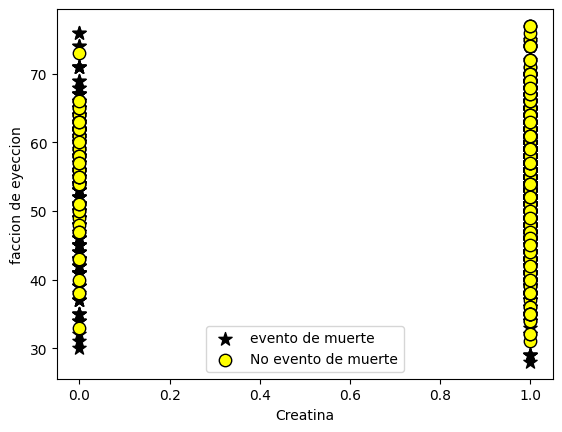

In [8]:
plotData(X, y)

NORMALIZACION DE CARACTERISTICAS
Ajusta a una escala similar, normaliza las caracteristicas en X utilizando una funcion, muestra la matriz X original, la media, la desviacion estandar y la matriz normalizada.

In [9]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [10]:
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 40.   1.   2. 140. 289.]
 [ 49.   0.   3. 160. 180.]
 [ 37.   1.   2. 130. 283.]
 ...
 [ 57.   1.   4. 130. 131.]
 [ 57.   0.   2. 130. 236.]
 [ 38.   1.   3. 138. 175.]]
Media calculada: [ 53.72016807   0.76386555   3.23277311 132.15378151 210.36386555]
Desviación estandar calculada: [  9.35426995   0.42470575   0.93508722  18.3611038  101.37786644]
[[-1.46672783  0.55599543 -1.31835093  0.42732826  0.7756736 ]
 [-0.50460037 -1.79857595 -0.24893198  1.51658739 -0.29951178]
 [-1.78743698  0.55599543 -1.31835093 -0.11730131  0.71648908]
 ...
 [ 0.35062404  0.55599543  0.82048698 -0.11730131 -0.782852  ]
 [ 0.35062404 -1.79857595 -1.31835093 -0.11730131  0.25287704]
 [-1.68053393  0.55599543 -0.24893198  0.31840234 -0.34883221]]


FUNCION SIGMOIDE
Crea y calcula la funcion sigmoide, que se utiliza en la regresion logistica, llama algunos valores de prueba e imprime los resultados.

In [11]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [12]:
# Prueba la implementacion de la funcion sigmoid
z = [-100, 0.5, 1000000]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [-100, 0.5, 1000000] ) =  [3.72007598e-44 6.22459331e-01 1.00000000e+00]


PREPARACION PARA EL DESCENSO POR EL GRADIENTE
Obtiene el numero de filas(m) y columnas (n) y agrega una columna de unos a X para representar el termino de interseccion en la regresion logistica.

In [13]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

FUNCION DE COSTO Y DESCENSO POR EL GRADIENTE
Crea la funcion para calcular el costo de la regresion logistica, funcion para realizar el descenso por el gradiente, actualizando los parametros theta para minimizar el costo y grafica la convergencia del costo, calculo vectorial.

In [14]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [15]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 0.084474    0.50820196  0.65343577  1.04224192  0.24862043 -0.29666816]
 (usando el descenso por el gradiente):1


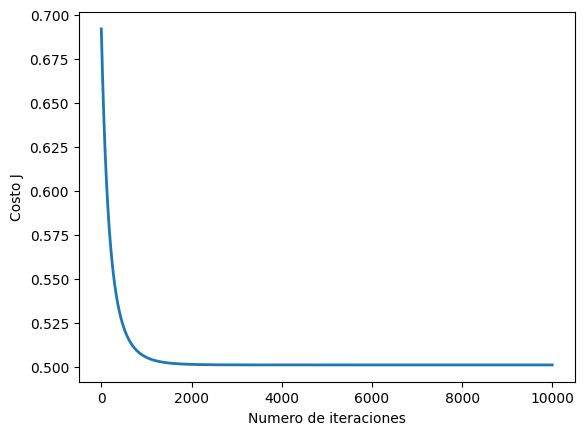

In [16]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [0.03,0.05, 0.03, 0.034,0.01,0.047]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(' (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

PREDICCIONES Utiliza los parametros theta calculados para predecir la probabilidad de evento de muertes y muetra la prediccion.

In [17]:
X_array = [0.05, 0.03, 0.034,0.01,0.047,0.7]
y_predicted = sigmoid(np.dot(X_array, theta))
print('evento de muerte -> :{:.0f}'.format(y_predicted))

evento de muerte -> :0


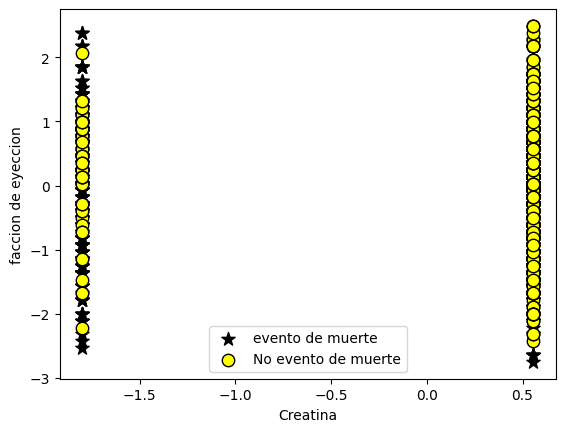

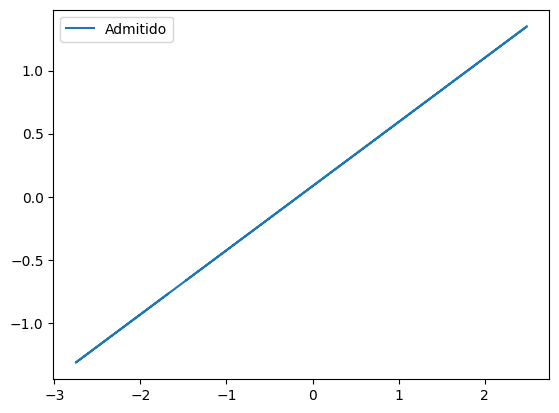

In [18]:
plotData(X[:, 1:3], y)
pyplot.plot(X[:, 1], theta[0] + X[:, 1] * theta[1], '-')
#pyplot.legend(['Datos de entrenamiento', 'Regresión lineal'])
pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])

FUNCION DE COSTO Y GRADIENTE(VECTORIZADA)
Calcula el costo y el gradiente de la redresion logistica y con diferentes valores de theta e imprime los resultados, comparandolos con los valores esperados.

In [19]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

In [20]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-0.02857143 -0.13080031 -0.1553791  -0.22968757 -0.06060818  0.0990211 ]
Gradiente en theta inicial (zeros):
	[-0.0286, -0.1308, -0.1554]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [21]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2,0.56,0.1,0.23])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X, y)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.     0.2    0.2    0.56   0.1    0.23]
Costo en theta prueba: 12.517
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[-0.529, -0.131, -0.155]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


OPTIMIZACION
Utiliza la funcion para encontrar los parametros theta optimos que minimicen el costo y muetra el costo final y los parametros theta optimizados.

In [22]:
from scipy import optimize
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n')

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

Costo con un valor de theta encontrado por optimize.minimize: 0.501
Costo esperado (aproximado): 0.203

theta:
	[0.084, 0.508, 0.653]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<ipython-input-22-9320978f03ab>:8: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


FUNCION
Simplimente devuelve las caracteristicas originales sin modificaciones.

In [23]:
def mapFeature(X1, X2):
    """
    Devuelve las características originales sin modificaciones.
    """
    return np.array([X1, X2])

FUNCION Crear funcion para graficar el limite de decision de la regresion logistica junto con los datos.

In [24]:
def plotDecisionBoundary(plotData, theta, X, y):

    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)


FUNCION Crea una funcion para predecir la clase (0 y 1) utilizando los parametros theta y un umbral 0.5 y calcula la precision en el conjunto de entrenamiento y calcula la precision del modelo.

In [25]:
def predict(theta, X):

    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [26]:
# Predecir la probabilidad de un evento de muerte para un paciente con valores específicos

# Crea un array con los valores del paciente (incluyendo el 1 para el término de intersección)
paciente_ejemplo = np.array([1, 0.3, 2, 1, 0, 0.9])

# Calcula la probabilidad usando la función sigmoide y los parámetros theta
prob_evento_muerte = sigmoid(np.dot(paciente_ejemplo, theta))

# Imprime la probabilidad
print('Para un paciente con los valores dados, la probabilidad de un evento de muerte es: {:.3f}%'.format(prob_evento_muerte * 100))


# Calcula la precisión en el conjunto de entrenamiento
p = predict(theta, X)
precision = np.mean(p == y) * 100
print('Precisión del modelo en el conjunto de entrenamiento: {:.2f}%'.format(precision))

Para un paciente con los valores dados, la probabilidad de un evento de muerte es: 91.044%
Precisión del modelo en el conjunto de entrenamiento: 77.39%
